# Smart Water Quality Monitoring - Data Exploration and Cleaning

## AAI-530 Final Project

This notebook performs exploratory data analysis (EDA) and data preprocessing on IoT water quality sensor data from multiple river monitoring stations in Queensland, Australia.

**Objectives:**
1. Load and combine data from all monitoring stations
2. Understand data structure, types, and distributions
3. Handle missing values and outliers
4. Create water quality classification labels
5. Prepare data for machine learning models


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import warnings

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("Libraries loaded successfully!")


Libraries loaded successfully!


## 1. Data Loading

Load data from all 11 monitoring stations and combine into a single DataFrame.


In [2]:
# Define data directory path
DATA_DIR = '../archive'

# List all CSV files
csv_files = [f for f in os.listdir(DATA_DIR) if f.endswith('.csv')]
print(f"Found {len(csv_files)} monitoring station files:")
for f in csv_files:
    print(f"  - {f}")


Found 11 monitoring station files:
  - Proserpine_river_glen_isla_joined.csv
  - Plane_ck_sucrogen_joined.csv
  - sandy_ck_sorbellos_road_joined.csv
  - russell_river_east_russell_joined.csv
  - sandy_ck_homebush_joined.csv
  - Johnstone_river_innisfail_joined.csv
  - Mulgrave_river_deeral_joined.csv
  - Johnstone_river_coquette_point_joined.csv
  - Tully_River_Tully_Gorge_National_Park_joined.csv
  - Pioneer_Dumbleton_joined.csv
  - Tully_river_euramo_joined.csv


In [3]:
def load_station_data(filepath):
    """
    Load and preprocess data from a single monitoring station.
    
    Parameters:
    -----------
    filepath : str
        Path to the CSV file
        
    Returns:
    --------
    pd.DataFrame
        Preprocessed DataFrame with station identifier
    """
    # Extract station name from filename
    station_name = os.path.basename(filepath).replace('_joined.csv', '').replace('_', ' ').title()
    
    # Load data
    df = pd.read_csv(filepath)
    
    # Parse timestamp
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Add station identifier
    df['Station'] = station_name
    
    return df

# Load all stations
all_data = []
for filename in csv_files:
    filepath = os.path.join(DATA_DIR, filename)
    df = load_station_data(filepath)
    all_data.append(df)
    print(f"Loaded {filename}: {len(df):,} records, Columns: {list(df.columns)}")

# Combine all data
df_raw = pd.concat(all_data, ignore_index=True)
print(f"\n{'='*60}")
print(f"TOTAL RECORDS LOADED: {len(df_raw):,}")
print(f"{'='*60}")


Loaded Proserpine_river_glen_isla_joined.csv: 28,857 records, Columns: ['Timestamp', 'Q', 'Conductivity', 'NO3', 'Temp', 'Turbidity', 'Level', 'Dayofweek', 'Month', 'Station']
Loaded Plane_ck_sucrogen_joined.csv: 21,518 records, Columns: ['Timestamp', 'Q', 'Conductivity', 'NO3', 'Temp', 'Turbidity', 'Level', 'Dayofweek', 'Month', 'Station']
Loaded sandy_ck_sorbellos_road_joined.csv: 11,718 records, Columns: ['Timestamp', 'Q', 'Conductivity', 'NO3', 'Temp', 'Turbidity', 'Level', 'Dayofweek', 'Month', 'Station']
Loaded russell_river_east_russell_joined.csv: 29,052 records, Columns: ['Timestamp', 'Q', 'Conductivity', 'NO3', 'Temp', 'Turbidity', 'Level', 'Dayofweek', 'Month', 'Station']
Loaded sandy_ck_homebush_joined.csv: 35,832 records, Columns: ['Timestamp', 'Conductivity', 'NO3', 'Q', 'Temp', 'Turbidity', 'Level', 'Dayofweek', 'Month', 'Station']
Loaded Johnstone_river_innisfail_joined.csv: 32,955 records, Columns: ['Timestamp', 'Q', 'Level', 'Dayofweek', 'Month', 'Station']
Loaded Mul

## 2. Initial Data Exploration


In [4]:
# Display basic information about the dataset
print("Dataset Shape:", df_raw.shape)
print("\nColumn Data Types:")
print(df_raw.dtypes)
print("\nFirst 10 rows of the combined dataset:")
df_raw.head(10)


Dataset Shape: (295754, 10)

Column Data Types:
Timestamp       datetime64[ns]
Q                      float64
Conductivity           float64
NO3                    float64
Temp                   float64
Turbidity              float64
Level                  float64
Dayofweek                int64
Month                    int64
Station                 object
dtype: object

First 10 rows of the combined dataset:


,Timestamp,Q,Conductivity,NO3,Temp,Turbidity,Level,Dayofweek,Month,Station
0,2017-01-11 13:00:00,NaN,NaN,NaN,NaN,NaN,9.563333,2,1,Proserpine River Glen Isla
1,2017-01-11 14:00:00,NaN,NaN,NaN,NaN,NaN,8.885000,2,1,Proserpine River Glen Isla
2,2017-01-11 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2,1,Proserpine River Glen Isla
3,2017-01-11 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2,1,Proserpine River Glen Isla
4,2017-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2,1,Proserpine River Glen Isla
5,2017-01-11 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2,1,Proserpine River Glen Isla
6,2017-01-11 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2,1,Proserpine River Glen Isla
7,2017-01-11 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2,1,Proserpine River Glen Isla
8,2017-01-11 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2,1,Proserpine River Glen Isla
9,2017-01-11 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2,1,Proserpine River Glen Isla


In [5]:
# Summary statistics
print("Statistical Summary of Numeric Variables:")
df_raw.describe().round(2)


Statistical Summary of Numeric Variables:


,Timestamp,Q,Conductivity,NO3,Temp,Turbidity,Level,Dayofweek,Month
count,295754,107009.00,112626.00,52615.00,95019.00,112629.00,249131.00,295754.0,295754.00
mean,2018-08-22 10:24:36.399980800,63.20,7133.63,0.23,24.22,25.73,6.66,3.0,6.38
min,2016-03-01 00:00:00,-552.40,-0.10,0.00,12.48,-1.14,0.39,0.0,1.00
25%,2017-11-08 11:15:00,0.04,138.40,0.07,21.40,2.97,1.74,1.0,3.00
50%,2018-09-12 13:00:00,29.33,478.50,0.16,25.18,5.41,6.18,3.0,6.00
75%,2019-06-26 19:00:00,101.94,5339.68,0.30,27.30,15.70,10.10,5.0,10.00
max,2020-04-01 23:00:00,2931.96,57444.30,3.88,42.43,6372.61,19.85,6.0,12.00
std,NaN,143.55,13699.70,0.26,4.25,76.93,5.33,2.0,3.56


In [6]:
# Check unique stations and records per station
print(f"Number of Monitoring Stations: {df_raw['Station'].nunique()}")
print("\nRecords per Station:")
for station in df_raw['Station'].unique():
    station_count = len(df_raw[df_raw['Station'] == station])
    print(f"  - {station}: {station_count:,} records")

# Date range for each station
print("\n\nDate Ranges by Station:")
date_ranges = df_raw.groupby('Station')['Timestamp'].agg(['min', 'max'])
date_ranges.columns = ['Start Date', 'End Date']
date_ranges


Number of Monitoring Stations: 11

Records per Station:
  - Proserpine River Glen Isla: 28,857 records
  - Plane Ck Sucrogen: 21,518 records
  - Sandy Ck Sorbellos Road: 11,718 records
  - Russell River East Russell: 29,052 records
  - Sandy Ck Homebush: 35,832 records
  - Johnstone River Innisfail: 32,955 records
  - Mulgrave River Deeral: 29,051 records
  - Johnstone River Coquette Point: 25,354 records
  - Tully River Tully Gorge National Park: 28,440 records
  - Pioneer Dumbleton: 24,529 records
  - Tully River Euramo: 28,448 records


Date Ranges by Station:


,Start Date,End Date
Station,,
Johnstone River Coquette Point,2017-05-11 14:00:00,2020-04-01 23:00:00
Johnstone River Innisfail,2016-06-28 18:00:00,2020-04-01 20:00:00
Mulgrave River Deeral,2016-12-08 13:00:00,2020-04-01 23:00:00
Pioneer Dumbleton,2017-06-14 14:00:00,2020-04-01 14:00:00
Plane Ck Sucrogen,2017-10-18 10:00:00,2020-04-01 23:00:00
Proserpine River Glen Isla,2016-12-16 12:00:00,2020-04-01 20:00:00
Russell River East Russell,2016-12-08 12:00:00,2020-04-01 23:00:00
Sandy Ck Homebush,2016-03-01 00:00:00,2020-04-01 23:00:00
Sandy Ck Sorbellos Road,2018-11-30 09:00:00,2020-04-01 14:00:00


## 3. Missing Value Analysis


In [7]:
# Calculate missing values for each column
missing_df = pd.DataFrame({
    'Column': df_raw.columns,
    'Missing Count': df_raw.isnull().sum().values,
    'Missing %': (df_raw.isnull().sum() / len(df_raw) * 100).round(2).values
})
missing_df = missing_df.sort_values('Missing %', ascending=False)
print("Missing Values Summary:")
missing_df


Missing Values Summary:


,Column,Missing Count,Missing %
3,NO3,243139,82.21
4,Temp,200735,67.87
1,Q,188745,63.82
2,Conductivity,183128,61.92
5,Turbidity,183125,61.92
6,Level,46623,15.76
0,Timestamp,0,0.00
7,Dayofweek,0,0.00
8,Month,0,0.00
9,Station,0,0.00


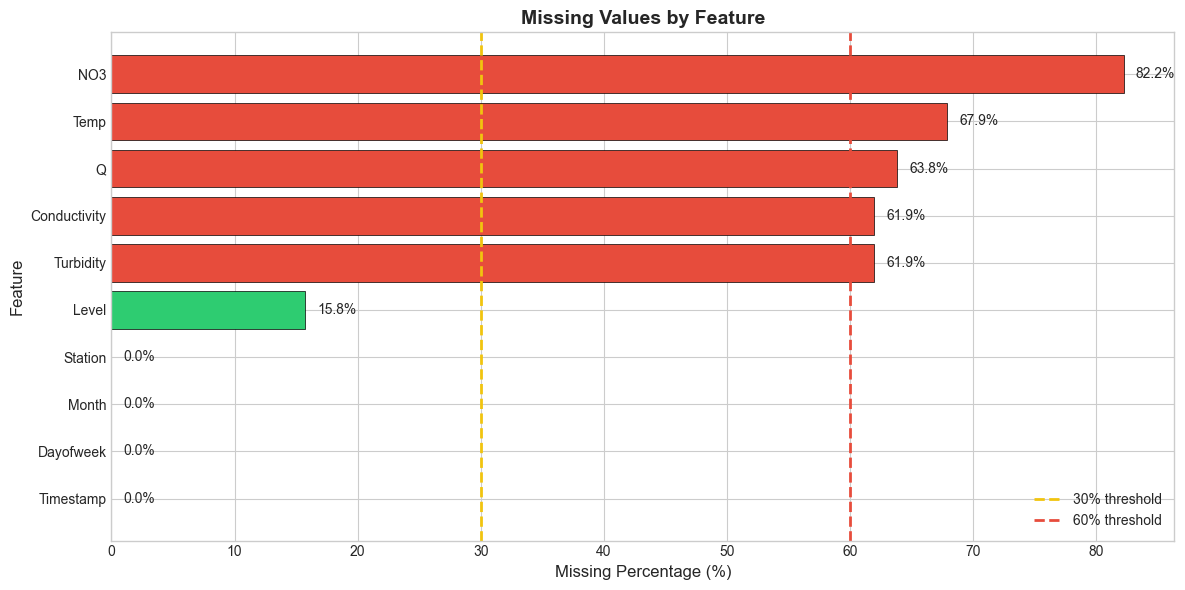

In [8]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(12, 6))

missing_pct = (df_raw.isnull().sum() / len(df_raw) * 100).sort_values(ascending=True)
colors = ['#2ecc71' if x < 30 else '#f1c40f' if x < 60 else '#e74c3c' for x in missing_pct]

bars = ax.barh(missing_pct.index, missing_pct.values, color=colors, edgecolor='black', linewidth=0.5)
ax.set_xlabel('Missing Percentage (%)', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
ax.set_title('Missing Values by Feature', fontsize=14, fontweight='bold')

# Add percentage labels
for bar, pct in zip(bars, missing_pct.values):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
            f'{pct:.1f}%', va='center', fontsize=10)

ax.axvline(x=30, color='#f1c40f', linestyle='--', linewidth=2, label='30% threshold')
ax.axvline(x=60, color='#e74c3c', linestyle='--', linewidth=2, label='60% threshold')
ax.legend(loc='lower right')

plt.tight_layout()
plt.savefig('../outputs/missing_values.png', dpi=150, bbox_inches='tight')
plt.show()


## 4. Data Cleaning


In [9]:
# Create a copy for cleaning
df_clean = df_raw.copy()

# Step 1: Remove duplicate rows
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates(subset=['Timestamp', 'Station'])
print(f"Removed {initial_rows - len(df_clean):,} duplicate rows")

# Step 2: Handle negative values (physically impossible for most parameters)
numeric_cols = ['Conductivity', 'NO3', 'Temp', 'Turbidity', 'Level']
for col in numeric_cols:
    if col in df_clean.columns:
        neg_count = (df_clean[col] < 0).sum()
        if neg_count > 0:
            df_clean.loc[df_clean[col] < 0, col] = np.nan
            print(f"Set {neg_count:,} negative values to NaN in {col}")


Removed 0 duplicate rows
Set 391 negative values to NaN in Conductivity
Set 40 negative values to NaN in Turbidity


In [10]:
# Step 3: Handle extreme outliers using IQR method
def remove_outliers_iqr(df, column, multiplier=3):
    """Set extreme outliers to NaN using IQR method."""
    if column not in df.columns:
        return df
    
    Q1 = df[column].quantile(0.01)
    Q99 = df[column].quantile(0.99)
    IQR = Q99 - Q1
    
    lower = Q1 - multiplier * IQR
    upper = Q99 + multiplier * IQR
    
    outliers = (df[column] < lower) | (df[column] > upper)
    outlier_count = outliers.sum()
    
    df.loc[outliers, column] = np.nan
    print(f"Removed {outlier_count:,} outliers from {column} (bounds: [{lower:.2f}, {upper:.2f}])")
    
    return df

# Apply outlier removal to key parameters
for col in ['Conductivity', 'Turbidity']:
    df_clean = remove_outliers_iqr(df_clean, col)

# Step 4: Sort data by station and timestamp
df_clean = df_clean.sort_values(['Station', 'Timestamp']).reset_index(drop=True)
print(f"\nCleaned dataset shape: {df_clean.shape}")


Removed 0 outliers from Conductivity (bounds: [-158890.08, 211855.51])
Removed 38 outliers from Turbidity (bounds: [-824.59, 1099.45])

Cleaned dataset shape: (295754, 10)


In [11]:
# Step 5: Interpolate missing values within each station
numeric_features = ['Conductivity', 'NO3', 'Temp', 'Turbidity', 'Level', 'Q']
available_features = [col for col in numeric_features if col in df_clean.columns]

print("Interpolating missing values...")
for station in df_clean['Station'].unique():
    mask = df_clean['Station'] == station
    station_data = df_clean.loc[mask, available_features].copy()
    
    # Set index to timestamp for time-based interpolation
    station_data.index = df_clean.loc[mask, 'Timestamp']
    
    # Interpolate with limit (max 6 hour gaps)
    station_data = station_data.interpolate(method='time', limit=6)
    
    # Update the main dataframe
    df_clean.loc[mask, available_features] = station_data.values

print("Interpolation complete!")

# Check remaining missing values
print("\nRemaining Missing Values After Cleaning:")
remaining_missing = (df_clean.isnull().sum() / len(df_clean) * 100).round(2)
for col, pct in remaining_missing.items():
    if pct > 0:
        print(f"  {col}: {pct}%")


Interpolating missing values...
Interpolation complete!

Remaining Missing Values After Cleaning:
  Q: 54.2%
  Conductivity: 45.25%
  NO3: 74.94%
  Temp: 58.52%
  Turbidity: 45.11%
  Level: 15.68%


## 5. Distribution Analysis


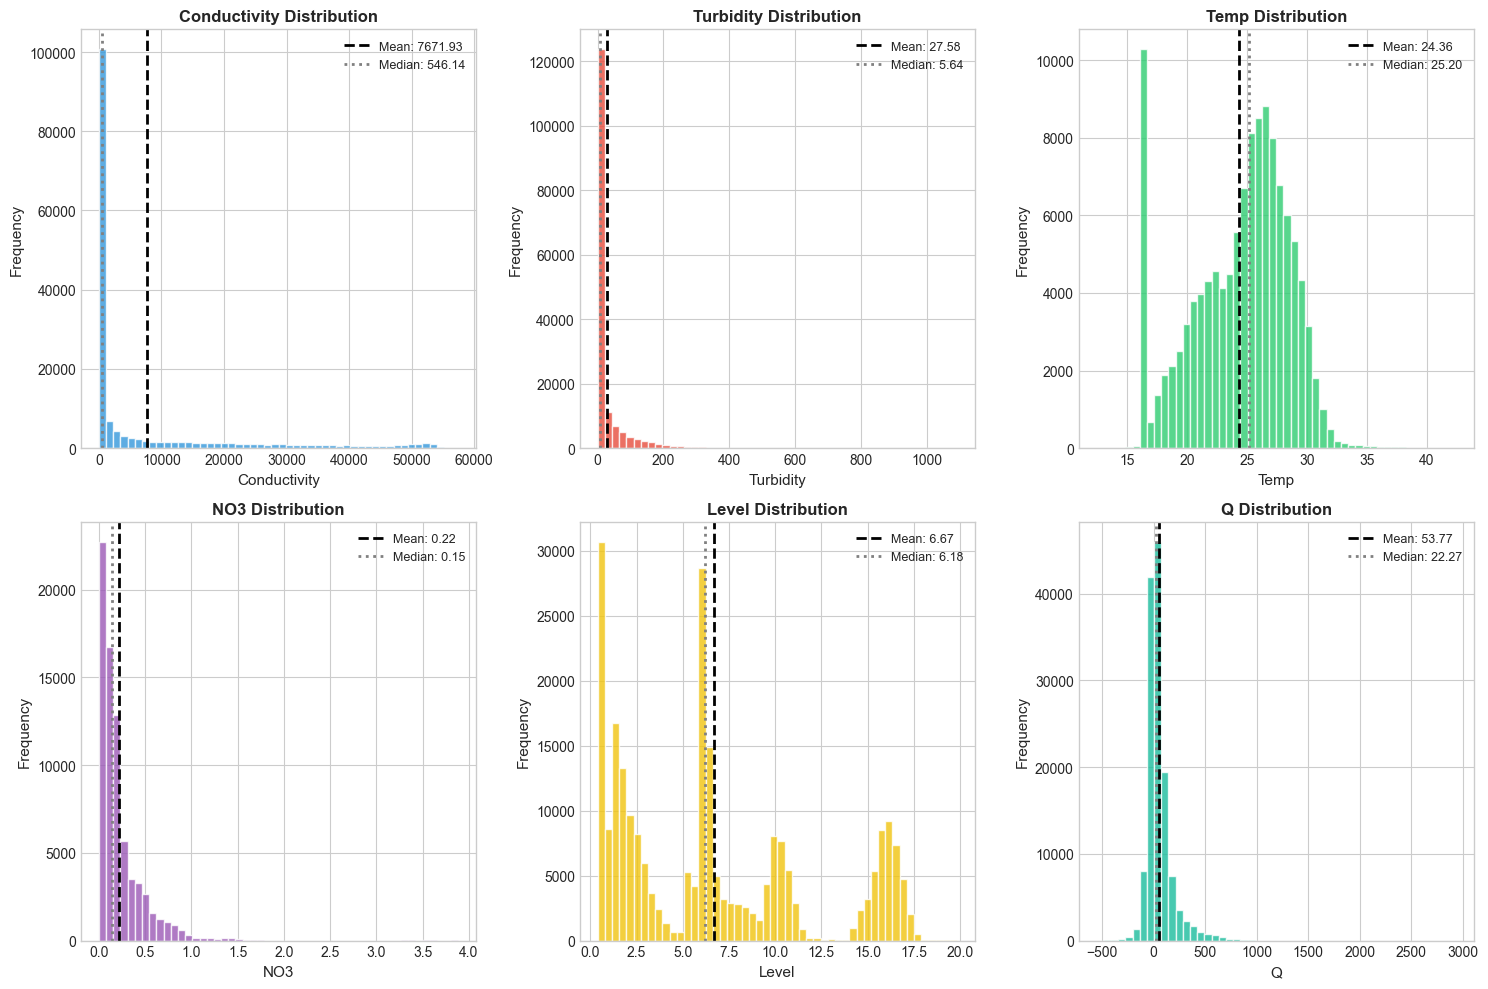

In [12]:
# Distribution of key water quality parameters
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

params = ['Conductivity', 'Turbidity', 'Temp', 'NO3', 'Level', 'Q']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f1c40f', '#1abc9c']

for i, (param, color) in enumerate(zip(params, colors)):
    if param in df_clean.columns:
        data = df_clean[param].dropna()
        if len(data) > 0:
            axes[i].hist(data, bins=50, color=color, edgecolor='white', alpha=0.8)
            axes[i].axvline(data.mean(), color='black', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
            axes[i].axvline(data.median(), color='gray', linestyle=':', linewidth=2, label=f'Median: {data.median():.2f}')
            axes[i].set_xlabel(param, fontsize=11)
            axes[i].set_ylabel('Frequency', fontsize=11)
            axes[i].set_title(f'{param} Distribution', fontsize=12, fontweight='bold')
            axes[i].legend(fontsize=9)
        else:
            axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=14)
            axes[i].set_title(f'{param} Distribution', fontsize=12, fontweight='bold')
    else:
        axes[i].text(0.5, 0.5, 'Column Not Available', ha='center', va='center', fontsize=12)
        axes[i].set_title(f'{param} Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/parameter_distributions.png', dpi=150, bbox_inches='tight')
plt.show()


## 6. Time Series Analysis


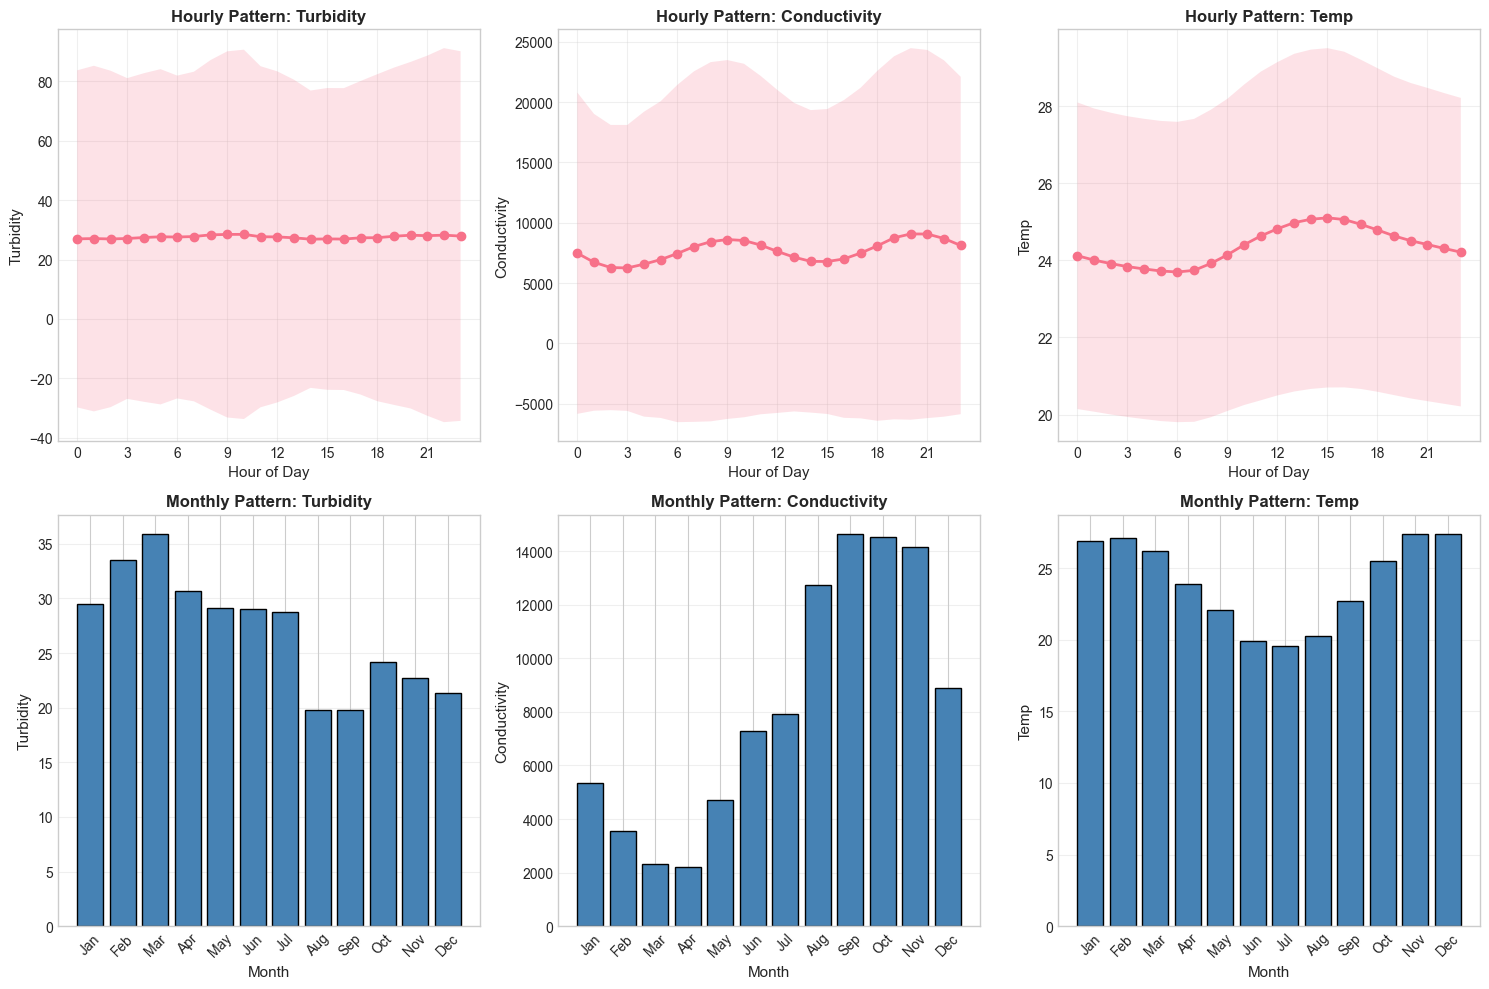

In [13]:
# Hourly and Monthly patterns
df_clean['Hour'] = df_clean['Timestamp'].dt.hour

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Hourly patterns
for i, param in enumerate(['Turbidity', 'Conductivity', 'Temp']):
    if param in df_clean.columns:
        hourly_mean = df_clean.groupby('Hour')[param].mean()
        hourly_std = df_clean.groupby('Hour')[param].std()
        
        axes[0, i].plot(hourly_mean.index, hourly_mean.values, 'o-', linewidth=2, markersize=6)
        axes[0, i].fill_between(hourly_mean.index, 
                                hourly_mean.values - hourly_std.values,
                                hourly_mean.values + hourly_std.values,
                                alpha=0.2)
        axes[0, i].set_xlabel('Hour of Day', fontsize=11)
        axes[0, i].set_ylabel(param, fontsize=11)
        axes[0, i].set_title(f'Hourly Pattern: {param}', fontsize=12, fontweight='bold')
        axes[0, i].set_xticks(range(0, 24, 3))
        axes[0, i].grid(True, alpha=0.3)

# Monthly patterns
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i, param in enumerate(['Turbidity', 'Conductivity', 'Temp']):
    if param in df_clean.columns:
        monthly_mean = df_clean.groupby('Month')[param].mean()
        
        axes[1, i].bar(monthly_mean.index, monthly_mean.values, color='steelblue', edgecolor='black')
        axes[1, i].set_xlabel('Month', fontsize=11)
        axes[1, i].set_ylabel(param, fontsize=11)
        axes[1, i].set_title(f'Monthly Pattern: {param}', fontsize=12, fontweight='bold')
        axes[1, i].set_xticks(range(1, 13))
        axes[1, i].set_xticklabels(months, rotation=45)
        axes[1, i].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../outputs/temporal_patterns.png', dpi=150, bbox_inches='tight')
plt.show()


## 7. Water Quality Classification Labels

Classify water quality based on Australian water quality guidelines:
- **Safe**: Normal operating conditions
- **Warning**: Parameters approaching concerning levels  
- **Unsafe**: Parameters exceed safe thresholds


In [14]:
def classify_water_quality(row):
    """
    Classify water quality based on sensor readings.
    
    Thresholds based on Australian water quality guidelines:
    - Turbidity: Safe < 5 NTU, Warning 5-50 NTU, Unsafe > 50 NTU
    - Conductivity: Safe < 30000 µS/cm, Warning 30000-50000, Unsafe > 50000
    - Temperature: Safe 10-30°C, Warning 5-10 or 30-35°C, Unsafe < 5 or > 35°C
    
    Returns: 'Safe', 'Warning', or 'Unsafe'
    """
    unsafe_count = 0
    warning_count = 0
    
    # Check Turbidity (NTU)
    if pd.notna(row.get('Turbidity')):
        if row['Turbidity'] > 50:
            unsafe_count += 1
        elif row['Turbidity'] > 5:
            warning_count += 1
    
    # Check Conductivity (µS/cm)
    if pd.notna(row.get('Conductivity')):
        if row['Conductivity'] > 50000:
            unsafe_count += 1
        elif row['Conductivity'] > 30000:
            warning_count += 1
    
    # Check Temperature (°C)
    if pd.notna(row.get('Temp')):
        if row['Temp'] < 5 or row['Temp'] > 35:
            unsafe_count += 1
        elif row['Temp'] < 10 or row['Temp'] > 30:
            warning_count += 1
    
    # Determine classification
    if unsafe_count >= 1:
        return 'Unsafe'
    elif warning_count >= 1:
        return 'Warning'
    else:
        return 'Safe'

# Apply classification
print("Classifying water quality...")
df_clean['Quality_Status'] = df_clean.apply(classify_water_quality, axis=1)

# Display distribution
print("\nWater Quality Classification Distribution:")
quality_dist = df_clean['Quality_Status'].value_counts()
quality_pct = df_clean['Quality_Status'].value_counts(normalize=True) * 100

for status in ['Safe', 'Warning', 'Unsafe']:
    if status in quality_dist.index:
        print(f"  {status}: {quality_dist[status]:,} ({quality_pct[status]:.1f}%)")


Classifying water quality...

Water Quality Classification Distribution:
  Safe: 197,350 (66.7%)
  Unsafe: 29,769 (10.1%)


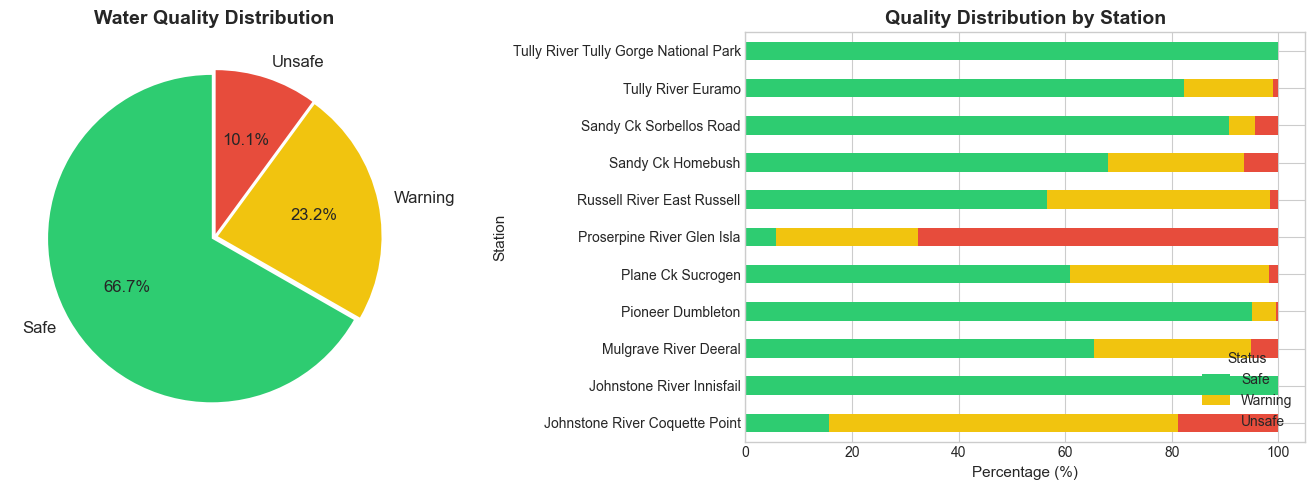

In [15]:
# Visualize quality distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = {'Safe': '#2ecc71', 'Warning': '#f1c40f', 'Unsafe': '#e74c3c'}
quality_counts = df_clean['Quality_Status'].value_counts()
axes[0].pie(quality_counts.values, labels=quality_counts.index, autopct='%1.1f%%',
            colors=[colors.get(x, 'gray') for x in quality_counts.index],
            explode=[0.02]*len(quality_counts), startangle=90,
            textprops={'fontsize': 12})
axes[0].set_title('Water Quality Distribution', fontsize=14, fontweight='bold')

# Bar chart by station
quality_by_station = pd.crosstab(df_clean['Station'], df_clean['Quality_Status'], normalize='index') * 100

# Ensure consistent column order
cols_order = [c for c in ['Safe', 'Warning', 'Unsafe'] if c in quality_by_station.columns]
quality_by_station = quality_by_station[cols_order]

quality_by_station.plot(kind='barh', stacked=True, ax=axes[1],
                        color=[colors.get(c, 'gray') for c in quality_by_station.columns])
axes[1].set_xlabel('Percentage (%)', fontsize=11)
axes[1].set_ylabel('Station', fontsize=11)
axes[1].set_title('Quality Distribution by Station', fontsize=14, fontweight='bold')
axes[1].legend(title='Status', loc='lower right')

plt.tight_layout()
plt.savefig('../outputs/quality_distribution.png', dpi=150, bbox_inches='tight')
plt.show()


## 8. Feature Engineering

Create additional features for machine learning models.


In [16]:
# Add time-based features
df_clean['Year'] = df_clean['Timestamp'].dt.year
df_clean['DayOfWeek'] = df_clean['Timestamp'].dt.dayofweek
df_clean['DayOfMonth'] = df_clean['Timestamp'].dt.day
df_clean['WeekOfYear'] = df_clean['Timestamp'].dt.isocalendar().week
df_clean['IsWeekend'] = df_clean['DayOfWeek'].isin([5, 6]).astype(int)

# Cyclical encoding for hour (captures daily patterns)
df_clean['Hour_sin'] = np.sin(2 * np.pi * df_clean['Hour'] / 24)
df_clean['Hour_cos'] = np.cos(2 * np.pi * df_clean['Hour'] / 24)

# Cyclical encoding for month (captures seasonal patterns)
df_clean['Month_sin'] = np.sin(2 * np.pi * df_clean['Month'] / 12)
df_clean['Month_cos'] = np.cos(2 * np.pi * df_clean['Month'] / 12)

print("Added time-based features!")
print(f"Dataset now has {df_clean.shape[1]} columns")


Added time-based features!
Dataset now has 21 columns


In [17]:
# Create lag features for key parameters (for time series prediction)
lag_features = ['Turbidity', 'Conductivity']
lags = [1, 6, 12, 24]  # 1h, 6h, 12h, 24h lags

print("Creating lag features...")
for station in df_clean['Station'].unique():
    mask = df_clean['Station'] == station
    station_df = df_clean.loc[mask].copy()
    
    for col in lag_features:
        if col in station_df.columns:
            for lag in lags:
                df_clean.loc[mask, f'{col}_lag_{lag}h'] = station_df[col].shift(lag)

print(f"Created {len(lag_features) * len(lags)} lag features")

# Create rolling statistics (moving averages and standard deviations)
rolling_features = ['Turbidity', 'Conductivity']
windows = [6, 12, 24]  # 6h, 12h, 24h windows

print("Creating rolling statistics...")
for station in df_clean['Station'].unique():
    mask = df_clean['Station'] == station
    station_df = df_clean.loc[mask].copy()
    
    for col in rolling_features:
        if col in station_df.columns:
            for window in windows:
                df_clean.loc[mask, f'{col}_rolling_mean_{window}h'] = station_df[col].rolling(window=window, min_periods=1).mean()
                df_clean.loc[mask, f'{col}_rolling_std_{window}h'] = station_df[col].rolling(window=window, min_periods=1).std()

print(f"Created rolling statistics features")
print(f"\nFinal dataset shape: {df_clean.shape}")


Creating lag features...
Created 8 lag features
Creating rolling statistics...
Created rolling statistics features

Final dataset shape: (295754, 41)


## 9. Save Processed Data


In [18]:
# Display final dataset info
print("Final Dataset Summary:")
print("="*60)
print(f"Total records: {len(df_clean):,}")
print(f"Total columns: {len(df_clean.columns)}")
print(f"Date range: {df_clean['Timestamp'].min()} to {df_clean['Timestamp'].max()}")
print(f"Stations: {df_clean['Station'].nunique()}")
print("\nColumns:")
for col in df_clean.columns:
    print(f"  - {col}")


Final Dataset Summary:
Total records: 295,754
Total columns: 41
Date range: 2016-03-01 00:00:00 to 2020-04-01 23:00:00
Stations: 11

Columns:
  - Timestamp
  - Q
  - Conductivity
  - NO3
  - Temp
  - Turbidity
  - Level
  - Dayofweek
  - Month
  - Station
  - Hour
  - Quality_Status
  - Year
  - DayOfWeek
  - DayOfMonth
  - WeekOfYear
  - IsWeekend
  - Hour_sin
  - Hour_cos
  - Month_sin
  - Month_cos
  - Turbidity_lag_1h
  - Turbidity_lag_6h
  - Turbidity_lag_12h
  - Turbidity_lag_24h
  - Conductivity_lag_1h
  - Conductivity_lag_6h
  - Conductivity_lag_12h
  - Conductivity_lag_24h
  - Turbidity_rolling_mean_6h
  - Turbidity_rolling_std_6h
  - Turbidity_rolling_mean_12h
  - Turbidity_rolling_std_12h
  - Turbidity_rolling_mean_24h
  - Turbidity_rolling_std_24h
  - Conductivity_rolling_mean_6h
  - Conductivity_rolling_std_6h
  - Conductivity_rolling_mean_12h
  - Conductivity_rolling_std_12h
  - Conductivity_rolling_mean_24h
  - Conductivity_rolling_std_24h


In [19]:
# Save processed data
output_path = '../outputs/water_quality_processed.csv'
df_clean.to_csv(output_path, index=False)
print(f"Saved processed data to: {output_path}")

# Save summary statistics
summary_stats = df_clean.describe()
summary_stats.to_csv('../outputs/summary_statistics.csv')
print("Saved summary statistics to: ../outputs/summary_statistics.csv")

# Preview final data
print("\nSample of processed data:")
df_clean.head()


Saved processed data to: ../outputs/water_quality_processed.csv
Saved summary statistics to: ../outputs/summary_statistics.csv

Sample of processed data:


,Timestamp,Q,Conductivity,NO3,Temp,Turbidity,Level,Dayofweek,Month,Station,Hour,Quality_Status,Year,DayOfWeek,DayOfMonth,WeekOfYear,IsWeekend,Hour_sin,Hour_cos,Month_sin,Month_cos,Turbidity_lag_1h,Turbidity_lag_6h,Turbidity_lag_12h,Turbidity_lag_24h,Conductivity_lag_1h,Conductivity_lag_6h,Conductivity_lag_12h,Conductivity_lag_24h,Turbidity_rolling_mean_6h,Turbidity_rolling_std_6h,Turbidity_rolling_mean_12h,Turbidity_rolling_std_12h,Turbidity_rolling_mean_24h,Turbidity_rolling_std_24h,Conductivity_rolling_mean_6h,Conductivity_rolling_std_6h,Conductivity_rolling_mean_12h,Conductivity_rolling_std_12h,Conductivity_rolling_mean_24h,Conductivity_rolling_std_24h
0,2017-05-11 14:00:00,NaN,13502.10,NaN,NaN,12.79,NaN,3,5,Johnstone River Coquette Point,14,Warning,2017,3,11,19,0,-0.500000,-8.660254e-01,0.5,-0.866025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.790000,NaN,12.790000,NaN,12.790000,NaN,13502.100,NaN,13502.100,NaN,13502.100,NaN
1,2017-05-11 15:00:00,NaN,10304.00,NaN,NaN,11.93,NaN,3,5,Johnstone River Coquette Point,15,Warning,2017,3,11,19,0,-0.707107,-7.071068e-01,0.5,-0.866025,12.79,NaN,NaN,NaN,13502.10,NaN,NaN,NaN,12.360000,0.608112,12.360000,0.608112,12.360000,0.608112,11903.050,2261.398197,11903.050,2261.398197,11903.050,2261.398197
2,2017-05-11 16:00:00,NaN,5588.08,NaN,NaN,10.34,NaN,3,5,Johnstone River Coquette Point,16,Warning,2017,3,11,19,0,-0.866025,-5.000000e-01,0.5,-0.866025,11.93,NaN,NaN,NaN,10304.00,NaN,NaN,NaN,11.686667,1.242994,11.686667,1.242994,11.686667,1.242994,9798.060,3981.194494,9798.060,3981.194494,9798.060,3981.194494
3,2017-05-11 17:00:00,NaN,13937.00,NaN,NaN,24.02,NaN,3,5,Johnstone River Coquette Point,17,Warning,2017,3,11,19,0,-0.965926,-2.588190e-01,0.5,-0.866025,10.34,NaN,NaN,NaN,5588.08,NaN,NaN,NaN,14.770000,6.249624,14.770000,6.249624,14.770000,6.249624,10832.795,3853.480567,10832.795,3853.480567,10832.795,3853.480567
4,2017-05-11 18:00:00,NaN,44761.40,NaN,NaN,18.46,NaN,3,5,Johnstone River Coquette Point,18,Warning,2017,3,11,19,0,-1.000000,-1.836970e-16,0.5,-0.866025,24.02,NaN,NaN,NaN,13937.00,NaN,NaN,NaN,15.508000,5.658319,15.508000,5.658319,15.508000,5.658319,17618.516,15535.991498,17618.516,15535.991498,17618.516,15535.991498
